## Modeling and Experiments

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

from xgboost import XGBClassifier


In [2]:
# Load the dataset
df = pd.read_csv('/data/processed/cleaned_and_processed_data.csv')
df.head()

,1/1/2014,1/2/2014,1/3/2014,1/4/2014,1/5/2014,1/6/2014,1/7/2014,1/8/2014,1/9/2014,1/10/2014,...,10/24/2016,10/25/2016,10/26/2016,10/27/2016,10/28/2016,10/29/2016,10/30/2016,10/31/2016,CONS_NO,FLAG
0,0.0,0.0,0.01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0.02,0.06,0.58,0.89,0.35,0.38,0.70,0.25,0387DD8A07E07FDA6271170F86AD9151,1
1,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,...,17.13,14.32,16.37,26.33,19.06,17.38,13.94,14.14,01D6177B5D4FFE0CABA9EF17DAFC2B84,1
2,0.0,0.0,0.00,0.0,0.0,4.98,9.87,11.29,13.44,11.34,...,NaN,1.43,2.22,2.41,3.48,2.89,1.88,1.16,4B75AC4F2D8434CFF62DB64D0BB43103,1
3,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,...,20.98,18.47,15.50,14.80,19.28,16.10,17.51,16.67,B32AC8CC6D5D805AC053557AB05F5343,1
4,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0.61,1.33,0.55,1.62,1.53,2.10,1.16,2.13,EDFC78B07BA2908B3395C4EB2304665E,1


In [20]:
# Drop rows with missing target
df = df.dropna(subset=['FLAG'])

# Separate X and y
X = df.drop(columns=['FLAG'])
y = df['FLAG']

# Fill missing values in features
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Train Random Forest to get feature importances
rf = RandomForestClassifier(random_state=42)
rf.fit(X_imputed, y)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Create DataFrame for importances and sort descending
feat_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Select top N features (e.g., top 20)
top_features = feat_imp_df['feature'].head(20).tolist()

print("Top features:", top_features)

# Create a new DataFrame with only the top features and the target column
df_selected = pd.concat([X_imputed[top_features], y.reset_index(drop=True)], axis=1)

# Save the selected features and target to a new CSV file
# df_selected.to_csv('/data/features/selected_features.csv', index=False)

print("Saved selected top features to 'selected_features.csv'")


Top features: ['monthly_avg_2014_01', 'std_consumption', 'mean_daily_diff', 'mean_rolling_deviation', 'monthly_avg_2014_02', 'monthly_avg_2014_03', 'mean_consumption', 'max_consumption', 'num_z_outliers', 'sum_consumption', 'monthly_avg_2016_10', 'lag_1', 'monthly_avg_2014_05', 'monthly_avg_2014_04', 'monthly_avg_2014_06', 'monthly_avg_2016_03', 'monthly_avg_2016_04', 'monthly_avg_2016_09', 'monthly_avg_2016_01', 'monthly_avg_2014_10']
Saved selected features to 'selected_top_features.csv'


In [ ]:
# Load selected top features data
df = pd.read_csv('/data/features/selected_features.csv')
df.head()

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, scale_pos_weight=1, subsample=0.6; total time=   2.8s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=10, n_estimators=300, scale_pos_weight=1, subsample=1.0; total time=   4.1s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.2, max_depth=7, n_estimators=300, scale_pos_weight=1, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.2, max_depth=7, n_estimators=300, scale_pos_weight=1, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.2, max_depth=7, n_estimators=300, scale_pos_weight=1, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.2, max_depth=3, n_estimators=300, scale_pos_weight=10.720954356846473, subsample=0.6; total time=   3.1s
[CV] END colsample_bytree=0.6, gamma=0.5, le

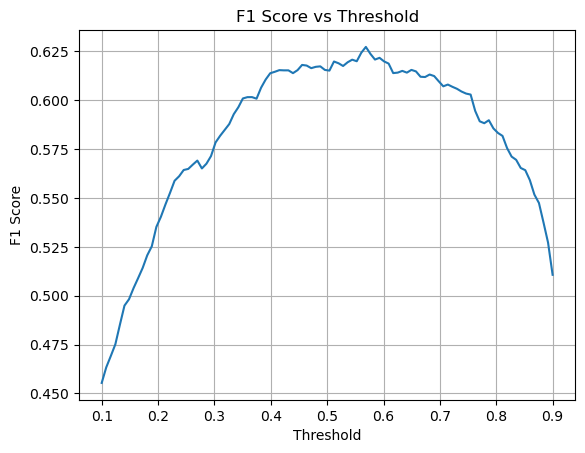

Confusion Matrix:
[[7604  148]
 [ 325  398]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      7752
           1       0.73      0.55      0.63       723

    accuracy                           0.94      8475
   macro avg       0.84      0.77      0.80      8475
weighted avg       0.94      0.94      0.94      8475



In [21]:
# Drop rows with missing target
df = df.dropna(subset=["FLAG"])

# Separate features and target
X = df.drop(columns=["FLAG"])
y = df["FLAG"]

# Fill missing values in features
X = X.fillna(0)

# Optional: scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Define the XGBoost model
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

# Hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'scale_pos_weight': [1, np.sum(y_train==0) / np.sum(y_train==1)]
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,
    scoring='f1',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Run hyperparameter tuning
random_search.fit(X_train, y_train)

print("Best hyperparameters found:")
print(random_search.best_params_)

# Best model
best_model = random_search.best_estimator_

# Predict probabilities on test set
y_probs = best_model.predict_proba(X_test)[:, 1]

# Find best threshold based on F1 score
thresholds = np.linspace(0.1, 0.9, 100)
f1_scores = [f1_score(y_test, (y_probs > t).astype(int)) for t in thresholds]

best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Best threshold by F1 score: {best_threshold:.3f}")

# Plot F1 vs threshold
plt.plot(thresholds, f1_scores)
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Threshold")
plt.grid(True)
plt.show()

# Use best threshold to predict labels
y_pred = (y_probs > best_threshold).astype(int)

# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
